<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/2.%20Shoppingmall_analysis/shopping_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 목적 

 쇼핑몰 입점 고객을 위한 상품 판매 예측 모델을 만들고, 입점한 고객이 자신의 상품을 입력했을때 판매예측결과와 자동으로 상품을 분석하여 최적화를 위한 방법을 제공하여 고객의 성공적인 판매를 돕기

< 컬럼 해석 >

|컬럼명|컬럼내용|
|-|-|
|tittle | 상품제목(유럽국가용으로 현지화된 제목)|
|tittle_orig | 원래 영어로된 상품 제목|
|Price |  제품가격|
|retail_price | 소비자 가격(소매가격)|
|currency_buyer | 가격의 통화|
|units_sold | 판매량|
|uses_ad_boosts | 판매자가 플랫폼내에서 광고나 상단고정과 같은 추가 비용 지불여부|
|rating | 평균 제품 등급|
|rating_count | 제품의 등급개수 총합|
|rating_five_count | 별5개등급|
|badges_count|배지 보유 개수|
|badge_local_product | 현지에서 생산된 제품 배지|
|badge_product_quality | 많은 구매자가 지속적으로 좋은 평가 했을때 수여되는 배지|
|badge_fast_shipping | 제품의 주문이 지속적으로 빠르게 배송될때 수여되는 배지|
|tags | 사용자가 설정한 태그 |
|product_color | 제품의 주요 색상|
|product_variation_size_id | 해당 제품의 변경 가능한 사이즈|
|product_variation_inventory | 판매자의 최대 허용 수량|
|shipping_option_name | 배송 옵션(표준배송 등등)|
|shipping_option_price | 배송비|
|shipping_is_express | 배송 급행 여부|
|countries_shipped_to | 상품이 배송가능 한 국가 설정수|
|inventory_total | 모든 제품 변형에 대한 총 재고(크기/ 색상 변형)|
|has_urgency_banner | 긴급한 베너가 있었는지|
|urgency_text | 검색 결과의 일부 제품 위에 나타나는 텍스트 베너|
|origin_country | 원산지|
|merchant_tittle | 판매자의 표시 이름(UI에 판매자 상품 이름으로 표시)|
|merchant_name | 판매자 이름|
|merchant_info_subtitle | 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트|
|merchant_rating_count | 이 판매자의 평가 수|
|merchant_rating | 상인의 평가|
|merchant_id | 판매자 고유 ID|
|merchant_has_profile_picture | merchant_profile_picture의 URL여부|
|merchant_profile_picture | 판매자의 프로필 사진 여부|
|product_url | 제품 페이지에 대한 URL|
|product_picture | 상품 사진 URL|
|product_id | 상품 id|
|theme | 웹사이트에서 상품검색시 사용하는 테마|
|crawl_month | 크롤링한 날짜|


# 1차 전처리

In [4]:
# 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# 데이터 불러오기
df = pd.read_csv('/content/Raw_data.csv')
print(df.shape)
raw_df = df.copy()
df 

(1573, 43)


,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [7]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1573개
--------------------------------------------------


merchant_profile_picture        86.0
has_urgency_banner              70.0
urgency_text                    70.0
rating_one_count                 3.0
rating_two_count                 3.0
rating_three_count               3.0
rating_four_count                3.0
rating_five_count                3.0
product_color                    3.0
origin_country                   1.0
product_variation_size_id        1.0
merchant_name                    0.0
merchant_info_subtitle           0.0
crawl_month                      0.0
badges_count                     0.0
rating_count                     0.0
badge_product_quality            0.0
rating                           0.0
uses_ad_boosts                   0.0
units_sold                       0.0
currency_buyer                   0.0
retail_price                     0.0
price                            0.0
title_orig                       0.0
badge_local_product              0.0
product_variation_inventory      0.0
badge_fast_shipping              0.0
m

평점이 5점인 것의 총 평가 수를 보면 극히 일부의 고객이 5점을 평가한것으로 정말 소수가 5점을 주어서 평균 평점이 5점으로 나온것으로 확인이 된다. 따라서 평점이 무조건 높다고 판매가 잘되는것은 아니고, 오히려 가설2에서 언급한것 처럼 평가 수 가 많은것이 성공적인 판매에 더 가깝고 상관관계가 높다.

## 결측값 처리

In [8]:
# 결측값 제거 

# 결측비율 70% 이상 컬럼 삭제
df = df.drop(columns = ['merchant_profile_picture', 'has_urgency_banner', 'urgency_text'])

# rating_one_count ~ _five_count 는 분석에 사용할 컬럼이며, 결측값이  작아서 삭제
list = []
for i in df[df['rating_one_count'].isnull() == True].index:
  list.append(i)
df = df.drop(index = list)

# origin_country의 대부분이 'CN'이므로 해당값으로 치환
df['origin_country'] = df['origin_country'].fillna('CN')

# 변경가능한 사이즈는 종류가 105개로 각기 다른기준으로 구분되어있어 컬럼을 삭제
df = df.drop(columns = 'product_variation_size_id')



print(f'결측값 제거후 남은 데이터의 수: {len(df)}')

결측값 제거후 남은 데이터의 수: 1528


In [9]:
# 상품색상 결측값 데이터 확인

# 앞선 결측값제거로 인한 인덱스 초기화
df = df.reset_index().drop(columns = 'index')

# 상품 색상 결측값 확인 
print(len(df.loc[df['product_color'].isna() == True]))

# 직접 url로 상품을 확인후 결측값을 채워준다.
df.loc[df['product_color'].isna() == True][['product_color','product_url']]

38


,product_color,product_url
26,NaN,https://www.wish.com/c/5b5edbae1e222732845e655f
30,NaN,https://www.wish.com/c/5c9d920da94960780239d468
146,NaN,https://www.wish.com/c/58e0f38f9bf29f55183efd0d
278,NaN,https://www.wish.com/c/5c935aa8778e8274b0bdcead
448,NaN,https://www.wish.com/c/5e70ba09e3d51e1002f7cf8e
486,NaN,https://www.wish.com/c/569de6363e68eb0d85e0cded
533,NaN,https://www.wish.com/c/56f640b461d6cf68cb5c5d83
570,NaN,https://www.wish.com/c/59636dbdc657d57012e8b3f3
572,NaN,https://www.wish.com/c/5ac302716931da0d71398f53
618,NaN,https://www.wish.com/c/5e7e0c35e27371898f419f5d


직접 상품의 링크에 접속해서 색깔정보를 채워넣기

In [10]:
# 상품색상 결측값 채우기
df.iloc[26,19] = 'white'
df.iloc[30,19]= 'black'
df.iloc[146,19] = 'rainbow'
df.iloc[278,19] = 'black'
df.iloc[486,19] = 'black'
df.iloc[533,19] = 'white'
df.iloc[570,19] = 'mintgreen'
df.iloc[572,19] = 'black'
df.iloc[623,19] = 'black'
df.iloc[624,19] = 'black'
df.iloc[645,19] = 'black'
df.iloc[673,19] = 'white'
df.iloc[712,19] = 'white'
df.iloc[818,19] = 'white'
df.iloc[855,19] = 'rainbow'
df.iloc[990,19] = 'mintgreen'
df.iloc[1008,19] = 'blue'
df.iloc[1033,19] = 'pink'
df.iloc[1067,19] = 'rainbow'
df.iloc[1072,19] = 'white & black'
df.iloc[1079,19] = 'white'
df.iloc[1085,19] = 'white'
df.iloc[1425,19] = 'white'

# 상품확인결과 기타 일반 물건에 의한 색상 구분이 어려워 삭제
df = df.drop(index = [448, 618, 690, 830, 944, 988, 997, 1004, 1083, 1152, 1301, 1330, 1427, 1431, 1463])

In [11]:
print(f'데이터의 총 개수는 : {len(df)}개')
print('-'*50)
round(df.isnull().mean().sort_values(ascending =False)*100)

데이터의 총 개수는 : 1513개
--------------------------------------------------


merchant_name                   0.0
tags                            0.0
badge_product_quality           0.0
badge_local_product             0.0
badges_count                    0.0
rating_one_count                0.0
rating_two_count                0.0
rating_three_count              0.0
rating_four_count               0.0
rating_five_count               0.0
crawl_month                     0.0
rating_count                    0.0
rating                          0.0
uses_ad_boosts                  0.0
units_sold                      0.0
currency_buyer                  0.0
retail_price                    0.0
price                           0.0
title_orig                      0.0
badge_fast_shipping             0.0
product_color                   0.0
theme                           0.0
product_variation_inventory     0.0
product_id                      0.0
product_picture                 0.0
product_url                     0.0
merchant_has_profile_picture    0.0
merchant_id                 

In [12]:
# 판매자의 이름 결측값 처리
df.loc[df['merchant_name'].isnull()==True] # 판매자 이름의 결측값은 모두 같은 사람이므로 임시로 하나의 이름으로 채워준다.
df['merchant_name'] = df['merchant_name'].fillna('jeongseok') # 판매자 이름을 jeongseok으로 임시로 채워주었다.

## 사용하지 않는 컬럼 제거

In [13]:
# 유럽언어제목을 삭제한 후 영어제목을 title로 변경
df = df.drop(columns = 'title')
df.rename(columns={'title_orig':'title'},inplace=True)


# 소매가격과 실제가격의 차이만으로 의미를 찾을 수없다고 판단(더 많은 변수들과 복합적이기 때문)
df = df.drop(columns = ['retail_price'])

# 통화는 모두 EUR사용하기 때문에 삭제
df = df.drop(columns = ['currency_buyer'])


# 판매자의 프로필만 확인하지 url을 통한 사진을 따로 확인하지 않으므로 삭제
df = df.drop(columns = ['merchant_has_profile_picture'])


# 테마는 모두 여름이고, 크롤링 날짜 또한 같은날 진행하였기 때문에 삭제
df = df.drop(columns = ['theme', 'crawl_month'])

# URL은 모델에 사용할 수 있는 컬럼이 아니고 인사이트도 없기 때문에 제거
df = df.drop(columns = ['product_picture', 'product_url'])


# 판매자 이름은 판매자 id와 겹치므로 제거
df = df.drop(columns = ['merchant_name'])


# 필요없는 컬럼 삭제(merchant_info_subtitle,merchant_title : 불필요한 텍스트/ inventory_total : 사용하지 않을 결측값)
df = df.drop(columns = ['merchant_info_subtitle', 'inventory_total', 'merchant_title'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   units_sold                   1513 non-null   int64  
 3   uses_ad_boosts               1513 non-null   int64  
 4   rating                       1513 non-null   float64
 5   rating_count                 1513 non-null   int64  
 6   rating_five_count            1513 non-null   float64
 7   rating_four_count            1513 non-null   float64
 8   rating_three_count           1513 non-null   float64
 9   rating_two_count             1513 non-null   float64
 10  rating_one_count             1513 non-null   float64
 11  badges_count                 1513 non-null   int64  
 12  badge_local_product          1513 non-null   int64  
 13  badge_product_qual

# 목적에 맞게 컬럼내용 수정

## 판매량(units_sold) 수정

5000개 이상 판매 시 성공적인 판매(successful_sold)

In [14]:
# unites_sold 값 확인
df['units_sold'].value_counts()

100       493
1000      399
5000      216
10000     177
20000     103
50         72
10         29
50000      16
100000      6
7           1
2           1
Name: units_sold, dtype: int64

In [15]:
# successful_sold컬럼으로 변경
sold_list = []
for i in df['units_sold']:
  if i >= 5000:
    sold_list.append(1)
  else:
    sold_list.append(0)

df['successful_sold'] = sold_list
df[['units_sold', 'successful_sold']]

,units_sold,successful_sold
0,100,0
1,20000,1
2,100,0
3,5000,1
4,100,0
...,...,...
1523,10000,1
1524,100,0
1525,100,0
1526,100,0


In [16]:
df = df.drop(columns = ['units_sold'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   uses_ad_boosts               1513 non-null   int64  
 3   rating                       1513 non-null   float64
 4   rating_count                 1513 non-null   int64  
 5   rating_five_count            1513 non-null   float64
 6   rating_four_count            1513 non-null   float64
 7   rating_three_count           1513 non-null   float64
 8   rating_two_count             1513 non-null   float64
 9   rating_one_count             1513 non-null   float64
 10  badges_count                 1513 non-null   int64  
 11  badge_local_product          1513 non-null   int64  
 12  badge_product_quality        1513 non-null   int64  
 13  badge_fast_shippin

## 배송방법(shipping_option_name)수정

In [17]:
df['shipping_option_name'].value_counts()

Livraison standard         1451
Standard Shipping            21
Envio Padrão                  7
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Стандартная доставка          3
Livraison Express             2
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

|배송방법|배송형태|
|-|-|
|Livraison Express | **특급배송**|
|Ekspresowa wysyłka | **특급배송**|
|Livraison standard | 표준배송|
|Standard Shipping | 표준배송|
|Envio Padrão | 표준배송|
|Expediere Standard | 표준배송|
|Envío normal | 표준배송|
|الشحن القياسي | 표준배송|
|Standardversand | 표준배송|
|Standardowa wysyłka | 표준배송|
|Стандартная доставка | 표준배송|
|การส่งสินค้ามาตรฐาน | 표준배송|
|Standart Gönderi | 표준배송|
|Spedizione standard  | 표준배송|
|ការដឹកជញ្ជូនតាមស្តង់ដារ | 표준배송|


In [18]:
# 배송방법에서 -> 특급배송여부로 컬럼의 속성을 변경

shipping_list = []
special = ['Livraison Express', 'Ekspresowa wysyłka']

for i in df['shipping_option_name']:
  if i in special:
    shipping_list.append(1)
  else:
    shipping_list.append(0)

df['shipping_option_name'] = shipping_list
df['shipping_option_name'].value_counts()

0    1510
1       3
Name: shipping_option_name, dtype: int64

In [19]:
df.rename(columns = {'shipping_option_name':'quick_shipping'},inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   uses_ad_boosts               1513 non-null   int64  
 3   rating                       1513 non-null   float64
 4   rating_count                 1513 non-null   int64  
 5   rating_five_count            1513 non-null   float64
 6   rating_four_count            1513 non-null   float64
 7   rating_three_count           1513 non-null   float64
 8   rating_two_count             1513 non-null   float64
 9   rating_one_count             1513 non-null   float64
 10  badges_count                 1513 non-null   int64  
 11  badge_local_product          1513 non-null   int64  
 12  badge_product_quality        1513 non-null   int64  
 13  badge_fast_shippin

## 배송급행여부(shipping_is_express)수정

In [20]:
df['shipping_is_express'].value_counts()

0    1510
1       3
Name: shipping_is_express, dtype: int64

In [21]:
df.loc[df['quick_shipping']==1]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,quick_shipping,shipping_option_price,shipping_is_express,countries_shipped_to,origin_country,merchant_rating_count,merchant_rating,merchant_id,product_id,successful_sold
643,New Sexy Women Strap Backless Pajamas Lingerie...,8.0,0,2.79,14,5.0,1.0,0.0,2.0,6.0,2,1,0,1,"Mini,Dress,summer dress,Mini dress,silk dress,...",brown,50,1,7,1,41,CN,7012,4.336708,587dd9a883eee74e06b30974,5aabae5e7ddb066f389e4e7b,0
737,Summer Women's Fashion Sleeveless V-neck backl...,49.0,0,4.67,6,4.0,2.0,0.0,0.0,0.0,1,0,0,1,"party,Goth,Plus Size,Summer,Dress,V-neck,bodyc...",Rose red,2,1,12,1,41,CN,29977,4.223138,5925555b2cd9447854443c41,5d09ecc2f5d4eb7721203368,0
1033,Sexy Women Camouflage Print Bandage Push-up Sw...,6.0,0,4.29,2808,1789.0,459.0,300.0,110.0,150.0,3,1,1,1,"bathing suit,Fashion,fashion swimsuit,bikini s...",pink,50,1,7,1,39,CN,33675,4.314150,5577b101429aa92940bc33e7,588c54fb6661e84246a8aa71,1


배송급행여부는 배송방법의 특급배송과 같으므로 다중공선성문제가 생기기 때문에 삭제해준다.

In [22]:
df.drop(columns=['shipping_is_express'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   uses_ad_boosts               1513 non-null   int64  
 3   rating                       1513 non-null   float64
 4   rating_count                 1513 non-null   int64  
 5   rating_five_count            1513 non-null   float64
 6   rating_four_count            1513 non-null   float64
 7   rating_three_count           1513 non-null   float64
 8   rating_two_count             1513 non-null   float64
 9   rating_one_count             1513 non-null   float64
 10  badges_count                 1513 non-null   int64  
 11  badge_local_product          1513 non-null   int64  
 12  badge_product_quality        1513 non-null   int64  
 13  badge_fast_shippin

## 배송가능한 국가 수 (countries_shipped_to) 수정

In [23]:
np.sort(df['countries_shipped_to'].unique())

array([  6,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  78,  79,  80,  81,  82,  83,  84,  90,  91,  93,
        94, 104, 105, 107, 109, 111, 118, 124, 125, 127, 132, 135, 137,
       138, 139, 140])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


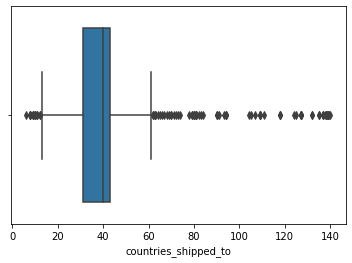

In [24]:
sns.boxplot(df['countries_shipped_to'])

In [25]:
print(df['countries_shipped_to'].median())
print(df['countries_shipped_to'].mean())

40.0
40.374752148050234


중간값과 평균값이 비슷한 것으로 보아 극히 일부가 이상치로 포함되어 있으므로 중간값을 기준으로 해서 배송범위가 매우 넓음여부로 변경

In [26]:
country_list = []

for i in df['countries_shipped_to']:
  if i > 40:
    country_list.append(1)
  else:
    country_list.append(0)

df['countries_shipped_to'] = country_list
df['countries_shipped_to'].value_counts()

# 배송범위 매우넓음(40 초과): 1, 배송범위 매우넓지는 않음(40이하) : 0

0    842
1    671
Name: countries_shipped_to, dtype: int64

In [27]:
df.rename(columns = {'countries_shipped_to':'shipped_range'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   uses_ad_boosts               1513 non-null   int64  
 3   rating                       1513 non-null   float64
 4   rating_count                 1513 non-null   int64  
 5   rating_five_count            1513 non-null   float64
 6   rating_four_count            1513 non-null   float64
 7   rating_three_count           1513 non-null   float64
 8   rating_two_count             1513 non-null   float64
 9   rating_one_count             1513 non-null   float64
 10  badges_count                 1513 non-null   int64  
 11  badge_local_product          1513 non-null   int64  
 12  badge_product_quality        1513 non-null   int64  
 13  badge_fast_shippin

## 원산지(origin_country) 수정

In [28]:
df['origin_country'].value_counts()

CN    1474
US      31
VE       5
SG       2
GB       1
Name: origin_country, dtype: int64

In [29]:
# 1513개의 데이터중 1474개가 중국이므로 중국과 아닌것으로 변환

origin_list = []

for i in df['origin_country']:
  if i == 'CN':
    origin_list.append(1)
  else:
    origin_list.append(0)

df.rename(columns={'origin_country':'made_in_china'},inplace=True)
df['made_in_china'] = origin_list
df['made_in_china'].value_counts()

1    1474
0      39
Name: made_in_china, dtype: int64

## 평가(rating)수정

In [30]:
# rating이 너무 다양하게 있어서 소수점 첫째자리 까지 수정
df['rating'] = round(df['rating'],1)
df['rating'].unique()

array([3.8, 3.4, 3.6, 4. , 3.1, 5. , 3.5, 3.3, 3.9, 3.7, 4.2, 4.3, 4.1,
       4.4, 2.8, 1.5, 3. , 3.2, 2.7, 4.5, 2.6, 4.8, 4.6, 2.5, 2.9, 2. ,
       1. , 4.7, 2.2, 2.3, 2.4])

# 가설검정

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 1527
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1513 non-null   object 
 1   price                        1513 non-null   float64
 2   uses_ad_boosts               1513 non-null   int64  
 3   rating                       1513 non-null   float64
 4   rating_count                 1513 non-null   int64  
 5   rating_five_count            1513 non-null   float64
 6   rating_four_count            1513 non-null   float64
 7   rating_three_count           1513 non-null   float64
 8   rating_two_count             1513 non-null   float64
 9   rating_one_count             1513 non-null   float64
 10  badges_count                 1513 non-null   int64  
 11  badge_local_product          1513 non-null   int64  
 12  badge_product_quality        1513 non-null   int64  
 13  badge_fast_shippin

## 가설1. 광고를 넣으면 판매가 더 잘될것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


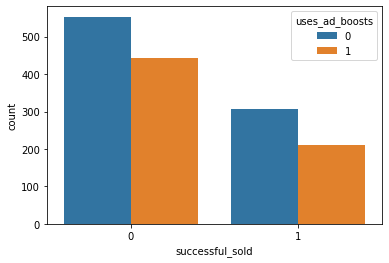

In [32]:
sns.countplot(df['successful_sold'], hue = df['uses_ad_boosts'])

광고를 넣었다고해서 성공적인 판매로 이어지는것은 아니다.

## 가설2. 평가수 가 많을수록 높은 판매량을 기록할 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


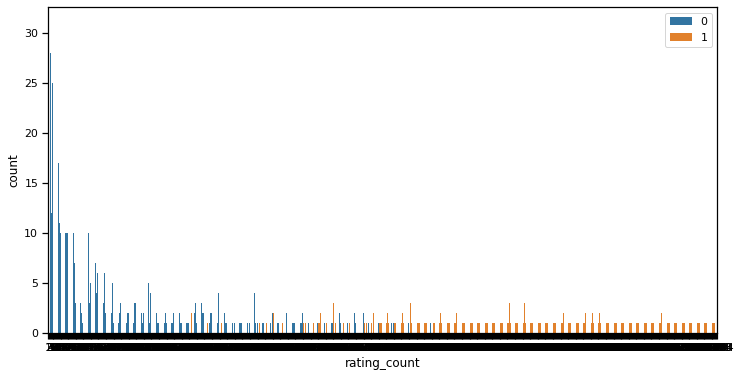

In [33]:
plt.figure(figsize =(12, 6))
sns.set_context('notebook')
sns.countplot(df['rating_count'], hue = df['successful_sold'])

ax =plt.gca()
ax.legend(loc = 'upper right')
plt.show()

평가수가 적을경우 성공적으로 판매가 이루어 지기 힘들고 평가수가 높을수록 성공적인 판매에 가까워진다. 또한 일정 평가 수 이상을 기록하면 성공적인 판매로 이루어지는것을 볼 수 있다.

## 가설3. 평가수가 많은 사람들은 뱃지를 가지고 있을것이다. < - > 뱃지를 가지고 있는사람은 평가수가 높을것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


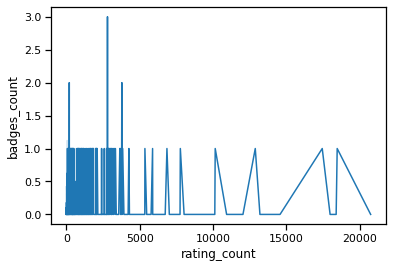

In [34]:
sns.lineplot(df['rating_count'],df['badges_count'])

평가수가 많다고 해서 뱃지를 가지고 있을것이라는것은 비례하지않다.

## 가설4. 평점이 높을수록 판매량이 높을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


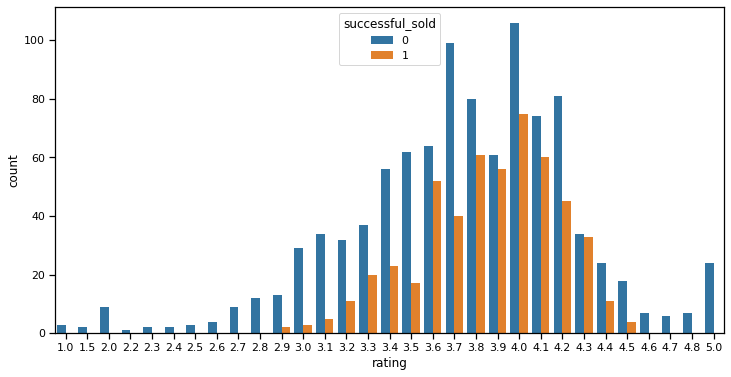

In [35]:
plt.figure(figsize = (12,6));
sns.countplot(df['rating'], hue = df['successful_sold']);

평점이 무조건 높다고 성공적인 판매를 기록하는것은 아닌것 같다. 그 이유는 무엇일까??

In [36]:
df[df['rating']==5.0]

,title,price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_inventory,quick_shipping,shipping_option_price,shipped_range,made_in_china,merchant_rating_count,merchant_rating,merchant_id,product_id,successful_sold
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",navyblue,1,0,1,0,1,65,3.507692,5e4b9c3801ba9d210036fc5a,5ec645bafd107a02279c8c54,0
61,Women s New Fashion Solid Color Pants Loose Ca...,5.00,1,5.0,2,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Fashion,pants,widelegpant,Women's Fashi...",khaki,17,0,1,0,1,9,3.666667,5e4b6a0c57cc9b0b53e499a4,5eba6ecb9a9e129fb97b5dfd,0
119,Summer Casual Front Knot Cotton Sleeveless Irr...,7.00,0,5.0,2,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Vest,Plus Size,Tank,Tops,V-neck,Fashion...",black,50,0,2,1,1,9703,3.970731,5a9e4f25e05388149703d9c8,5edf1267c771c4255ceee25d,0
126,Ladies Summer Tie Dye Print Short Sleeve Off S...,5.00,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",yellow,5,0,2,1,1,4,3.750000,5e6771b33cce5a8dd4f6fd3c,5ed868776a5a342472182986,0
208,Short Sleeve Beach Dress Women Summer Print V ...,8.00,0,5.0,2,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,short sleeve dress,neck dress,Necks,Sle...",yellow,5,0,2,0,1,127,3.874016,5eb51ed929e7865dc268a561,5ec1e63f7abee20ab93c68f2,0
299,Fashion Crop Top for Women Spaghetti Strap V N...,5.00,0,5.0,2,2.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,crop top,clubwear,Tank,Tops,S...",black,13,0,2,1,1,5316,4.224605,5b507899ab577736508a0782,5ea27636bea0a409031ae82f,0
305,Summer New Europe and The United States Sexy R...,8.00,0,5.0,13,13.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Flowers,Necks,printed,Pocket,fashion dr...",yellow,50,0,2,0,1,138,3.659420,5d50fb2b1d9a8e23e3334c81,5ef0ef11f30aba4e22166d4b,0
319,Anti-Fog Summer Swimming Full Face Mask Surfac...,14.00,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"divingsnorkel,divingmask,Summer,divingequipmen...",pink,5,0,3,1,1,9217,4.173050,569f3031b3d90139e3c5a407,5e90074a5dd4013b350b81e4,0
361,2020 New Upgrade 170/150/100/30CM Inflatable S...,11.00,0,5.0,3,3.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,children39stoy,Outdoor,summerswimming,s...",blue,3,0,2,1,1,299,4.247492,5d58d3b433f0b4349bbe941f,5ed3bc0f48c418059f206943,0
657,Ladies Summer Tie Dye Print Short Sleeve Off S...,5.00,0,5.0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",yellow,5,0,2,1,1,4,3.750000,5e6771b33cce5a8dd4f6fd3c,5ed868776a5a342472182986,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


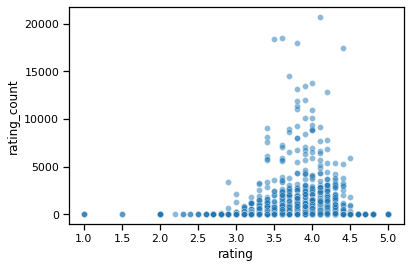

In [37]:
sns.scatterplot(df['rating'], df['rating_count'], alpha =0.5)

In [54]:
pip install scikit_posthocs

     |████████████████████████████████| 43 kB 1.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=762228194fcb4d4fe23bd1e2d5f8b54b0ca81bc21cd79fa0b4323448f7d723fd
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


## 가설5. 뱃지가 많을 수록 판매량이 높을 것이다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


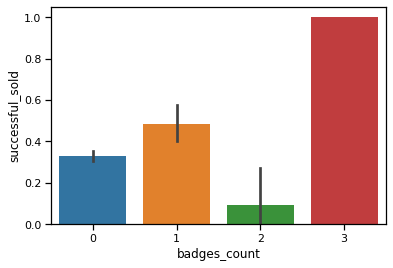

In [38]:
sns.barplot(df['badges_count'], df['successful_sold'])

In [39]:
print('뱃지0개',len(df[df['badges_count']==0]))
print('뱃지1개',len(df[df['badges_count']==1]))
print('뱃지2개',len(df[df['badges_count']==2]))
print('뱃지3개',len(df[df['badges_count']==3]))

뱃지0개 1367
뱃지1개 134
뱃지2개 11
뱃지3개 1


In [40]:
pd.DataFrame(df.groupby('badges_count')['successful_sold'].sum())

,successful_sold
badges_count,
0,451
1,65
2,1
3,1


In [41]:
df.loc[df['badges_count']==0]['badges_count']

0       0
1       0
2       0
3       0
4       0
       ..
1523    0
1524    0
1525    0
1526    0
1527    0
Name: badges_count, Length: 1367, dtype: int64

In [56]:
from scipy import stats
from scipy.stats import shapiro

w = df.loc[df['badges_count']==0]['successful_sold']
x = df.loc[df['badges_count']==1]['successful_sold']
y = df.loc[df['badges_count']==2]['successful_sold']
z = df.loc[df['badges_count']==2]['successful_sold']

print('뱃지0', stats.shapiro(w))
print('뱃지1', stats.shapiro(x))
print('뱃지2', stats.shapiro(y))
print('뱃지3', stats.shapiro(z))

뱃지0 (0.5931028127670288, 0.0)
뱃지1 (0.6360724568367004, 9.788207521096778e-17)
뱃지2 (0.3449910283088684, 2.2434040403140898e-08)
뱃지3 (0.3449910283088684, 2.2434040403140898e-08)


In [57]:
stats.kruskal(w, x, y,z)

KruskalResult(statistic=19.253963244296347, pvalue=0.00024225353107740522)

In [58]:
import scikit_posthocs as sp
sp.posthoc_conover(df,
                   val_col = 'successful_sold',
                   group_col = 'badges_count',
                   p_adjust = 'holm')

,0,1,2,3
0,1.000000,0.001763,0.284346,0.312625
1,0.001763,1.000000,0.039371,0.312625
2,0.284346,0.039371,1.000000,0.262138
3,0.312625,0.312625,0.262138,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


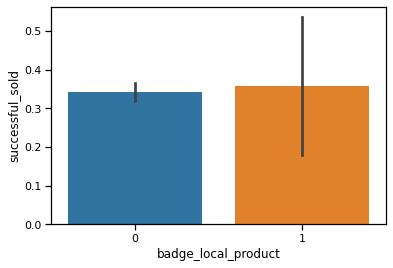

In [196]:
sns.barplot(df['badge_local_product'], df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


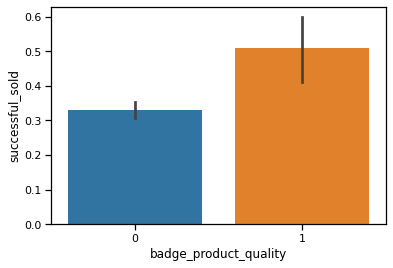

In [197]:
sns.barplot(df['badge_product_quality'], df['successful_sold'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


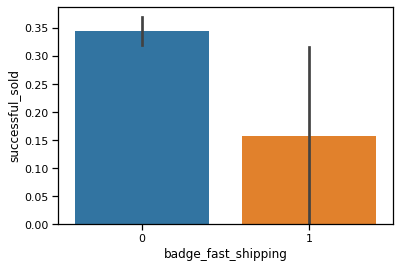

In [198]:
sns.barplot(df['badge_fast_shipping'], df['successful_sold'])

## 가설6. 인기있는 태그가 있을 것이고, 태그가 많을수록 판매량이 높을 것이다.

